In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage

In [7]:
f = h5py.File('snapshot_600.hdf5', 'r')
list(f.keys())
print(f['PartType0'].keys())
#print(dset.shape, dset.size, dset.ndim, dset.dtype)

<KeysViewHDF5 ['Coordinates', 'Density', 'DensityGradient', 'ElectronAbundance', 'GFM_CoolingRate', 'GFM_Metallicity', 'GFM_Metals', 'InternalEnergy', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'Velocities', 'VelocityCurl', 'VelocityDivergence', 'Vorticity']>


In [8]:
#collects x and y coord & mass into list x_coord and y_coord and mass
coord = f['PartType0']['Coordinates'].value
x_coord = coord[:,0]
y_coord = coord[:,1]
#collects mass into list mass and corrects unit
mass = f['PartType0']['Masses'].value
mass = [i * (10**10) for i in mass] # unit = solar mass

<ipython-input-8-627bef6914e2>:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  coord = f['PartType0']['Coordinates'].value
<ipython-input-8-627bef6914e2>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  mass = f['PartType0']['Masses'].value


In [9]:
#edges of plot and calculating area
nbins = 500
xedges = np.linspace(min(x_coord),max(x_coord), num = nbins)
yedges = np.linspace(min(y_coord),max(y_coord), num = nbins)
xlength = xedges[1]-xedges[0] #unit = kpc
ylength = yedges[1]-yedges[0]
area = xlength*ylength #unit = kpc^2

<ipython-input-10-b8742e1e3556>:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(sums.T), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=plt.cm.jet)


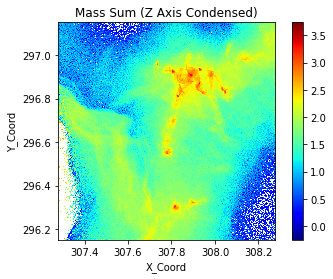

In [10]:
#plot weighted by bin mass: values of the returned histogram = sum of the weights of samples in each bin.
#therefore sums = sum of mass of each bin
sums, xbins, ybins = np.histogram2d(x_coord, y_coord, bins=(xedges, yedges), weights = mass)
plt.imshow(np.log10(sums.T), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=plt.cm.jet)
plt.xlabel("X_Coord")
plt.ylabel("Y_Coord")
plt.title('Mass Sum (Z Axis Condensed)')
plt.colorbar()
plt.show()

sums = sums / area

<ipython-input-11-9c15f098a32f>:6: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(sums.T), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=current_cmap)


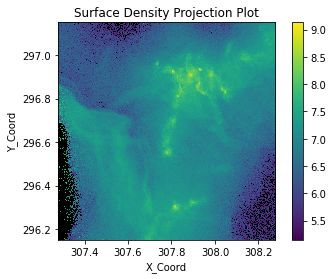

In [11]:
#finding surface density
#now sums = the surface density of each cell

current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='black')
plt.imshow(np.log10(sums.T), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=current_cmap)
plt.xlabel("X_Coord")
plt.ylabel("Y_Coord")
plt.title('Surface Density Projection Plot')
plt.colorbar()
plt.savefig('Projection_600')

plt.show()

<ipython-input-18-f5afa825d449>:4: RuntimeWarning: divide by zero encountered in log10
  heatmap = ax.pcolormesh(xedges, yedges, np.log10(sums.T), cmap=current_cmap)


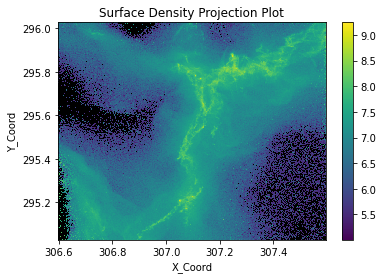

In [18]:
#plot "weighted" by surface density

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(xedges, yedges, np.log10(sums.T), cmap=current_cmap)

ax.set_title('Surface Density Projection Plot')
ax.set_xlabel('X_Coord')
ax.set_ylabel('Y_Coord')

cbar = plt.colorbar(heatmap)

plt.show()